# Loan Default Prediction Analysis

## 1. Introduction

# Business Understanding

## Problem Statement
This project analyzes loan data to predict loan defaults and assess loan performance. Loan defaults represent a significant challenge for financial institutions, leading to financial losses and increased risk. By identifying patterns and factors that contribute to defaults, stakeholders can make informed decisions to mitigate risks.

## Stakeholders
1. **Financial Institutions**: Banks and lending organizations can use this analysis to improve their credit risk assessment processes.
2. **Loan Officers**: They can use the insights to make better lending decisions.
3. **Regulatory Bodies**: They can monitor and enforce compliance with lending regulations.

## Project Value
This project provides actionable insights into loan performance and default prediction, enabling stakeholders to:
- Identify high-risk loans early.
- Optimize lending strategies.
- Reduce financial losses due to defaults.

# 2. Data Understanding

## Data Source
The dataset used in this analysis is `Final_Loans_dataset.csv`, which contains loan-related information such as borrower demographics, credit scores, loan amounts, and repayment status. The data is sourced from a financial institution and includes both performing and non-performing loans.

## Dataset Properties
- **Size**: 1,048,575 rows and 19 columns.
- **Features**: Includes borrower information (e.g., age, gender, employment status), loan details (e.g., principal amount, EMI), and performance metrics (e.g., arrears, loan status).
- **Target Variable**: `LOAN_STATUS` (e.g., CURRENT, EXPIRED, AUTH) and `PRUDENTIAL_CLASSIFICATION` (e.g., NORMAL, DOUBTFUL).

## Relevance to the Problem
The dataset is suitable for this project because:
- It contains historical loan data, which is essential for predicting defaults.
- It includes features that are known to influence loan performance, such as credit scores and income levels.
- The target variables (`LOAN_STATUS` and `PRUDENTIAL_CLASSIFICATION`) align with the problem of identifying loan defaults.

## Limitations
- **Missing Values**: Many columns have a high percentage of missing values, which may require imputation or removal.
- **Data Quality**: Some columns (e.g., `AGE`, `EMI`) contain inconsistent or unrealistic values that need cleaning.

# Import Libraries

In [1]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_palette("Set2")

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Load the dataset

In [2]:
#  reload the CSV with the low_memory=False parameter to properly handle the mixed data types:
df = pd.read_csv('../Data/Final_dataset_Final.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (115893, 18)


In [3]:
# Check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115893 entries, 0 to 115892
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         115893 non-null  int64  
 1   GENDER                     100117 non-null  object 
 2   AGE                        98437 non-null   float64
 3   MARITAL_STATUS             70425 non-null   object 
 4   EMPLOYMENT_STATUS          84133 non-null   object 
 5   CREDIT_SCORE               94881 non-null   float64
 6   SCORE_GRADE                94571 non-null   object 
 7   NO_DEFAULT_LOAN            94571 non-null   float64
 8   RISK_GRADE                 115893 non-null  object 
 9   PRODUCT                    115892 non-null  object 
 10  CURRENCY                   115893 non-null  object 
 11  NET INCOME                 115893 non-null  float64
 12  PRINCIPAL_DISBURSED        115893 non-null  object 
 13  EMI                        11

In [4]:
# Check the first few rows with more readable output
print(df.head().to_string())

       ID GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                     PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION   OD_AMOUNT LOAN_STATUS
0  104465   MALE   NaN            NaN               NaN         480.0          JJ              1.0        B20  Premium Finance - Consumer      KES         0.0          235,203.00  40,637.03     2995                      LOSS   45,011.10     EXPIRED
1  138046   MALE  55.0            NaN               NaN         537.0          JJ              2.0        B20     Consumer Unsecured Loan      KES         0.0          215,000.00   7,186.79     2582                      LOSS  115,674.06     EXPIRED
2  173501   MALE   NaN            NaN               NaN         545.0          JJ              1.0        B20     Consumer Unsecured Loan      KES         0.0          155,000.00   4,258.42     2667                      LOSS   65,541.89     EXPIRED
3  1

In [5]:
# Check the last few rows with more readable output
print(df.tail().to_string())

            ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION OD_AMOUNT LOAN_STATUS
115888  154303    MALE  38.0        MARRIED     SELF-EMPLOYED         624.0          HH              4.0         A5  Digital Personal Loan      KES  3090724.25          100,000.00  34,398.05        0                    NORMAL         0     CURRENT
115889   61445    MALE  43.0        MARRIED          EMPLOYED         579.0          JJ              1.0         A5            Mobile Loan      KES   819280.00           20,746.00  21,088.53        0                    NORMAL         0     CURRENT
115890  151235    MALE  27.0         SINGLE          EMPLOYED         636.0          HH              0.0         A5            Mobile Loan      KES   529145.61           12,700.00  12,909.69        0                    NORMAL         0     CURRENT
115891  

In [6]:
# Get descriptive statistics
df.describe(include='all')

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
count,115893.000000,100117,98437.000000,70425,84133,94881.000000,94571,94571.000000,115893,115892,115893,1.158930e+05,115893,115893,115893.000000,115893,115893,115893
unique,NaN,2,NaN,7,6,NaN,13,NaN,11,100,4,NaN,43552,83203,NaN,5,40474,3
top,NaN,MALE,NaN,MARRIED,EMPLOYED,NaN,JJ,NaN,A5,Mobile Loan,KES,NaN,"70,000.00","71,155.75",NaN,NORMAL,0,CURRENT
freq,NaN,71290,NaN,43927,47491,NaN,17804,NaN,84122,45289,114941,NaN,5192,2311,NaN,88645,74953,87592
mean,125044.802154,NaN,39.544368,NaN,NaN,651.381130,NaN,1.390775,NaN,NaN,NaN,1.443014e+06,NaN,NaN,236.655398,NaN,NaN,NaN
std,43349.212378,NaN,13.383122,NaN,NaN,80.207887,NaN,1.958711,NaN,NaN,NaN,4.520676e+06,NaN,NaN,664.039323,NaN,NaN,NaN
min,50001.000000,NaN,-1799.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
25%,87557.000000,NaN,33.000000,NaN,NaN,597.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
50%,124829.000000,NaN,38.000000,NaN,NaN,647.000000,NaN,1.000000,NaN,NaN,NaN,2.055950e+05,NaN,NaN,0.000000,NaN,NaN,NaN
75%,162685.000000,NaN,45.000000,NaN,NaN,710.000000,NaN,2.000000,NaN,NaN,NaN,1.173422e+06,NaN,NaN,21.000000,NaN,NaN,NaN


In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64


In [8]:
# calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                            0.000000
GENDER                       13.612556
AGE                          15.062169
MARITAL_STATUS               39.232741
EMPLOYMENT_STATUS            27.404589
CREDIT_SCORE                 18.130517
SCORE_GRADE                  18.398005
NO_DEFAULT_LOAN              18.398005
RISK_GRADE                    0.000000
PRODUCT                       0.000863
CURRENCY                      0.000000
NET INCOME                    0.000000
PRINCIPAL_DISBURSED           0.000000
EMI                           0.000000
OD_DAYS                       0.000000
PRUDENTIAL_CLASSIFICATION     0.000000
OD_AMOUNT                     0.000000
LOAN_STATUS                   0.000000
dtype: float64


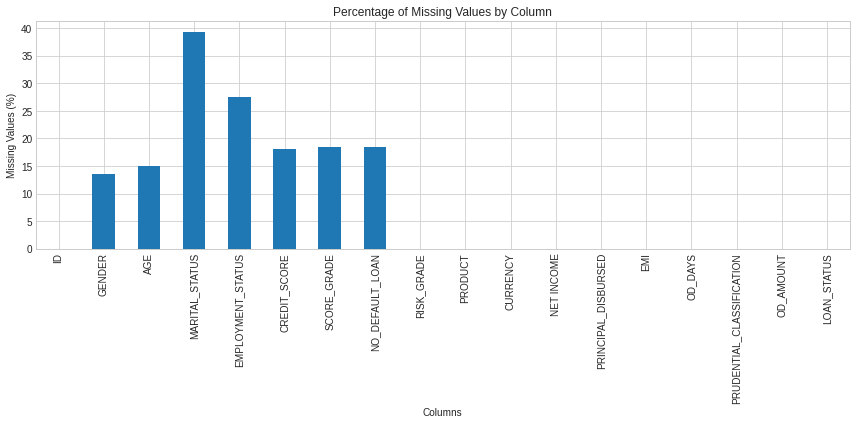

In [9]:
# Plot missing values 
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Clean Numeric Columns
# Remove commas and convert to float
# Columns with comma-separated numeric values
numeric_columns = ['EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

for col in numeric_columns:
    # Convert to string first to handle any non-string values
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


In [11]:
# Clean Age Column
# Convert to numeric and handle unrealistic values
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Remove unrealistic age values (less than 18 or greater than 100)
df.loc[(df['AGE'] < 18) | (df['AGE'] > 100), 'AGE'] = np.nan

In [12]:
# Handle Missing Values
# Drop rows with missing critical information
# These columns are crucial for meaningful analysis
critical_columns = ['CREDIT_SCORE', 'SCORE_GRADE', 'GENDER', 'AGE', 'EMPLOYMENT_STATUS']
df.dropna(subset=critical_columns, inplace=True)

In [13]:
# Fill missing Marital Status
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('OTHER')

In [14]:
# Standardize Categorical Columns
# Convert to uppercase for consistency
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'PRODUCT']
for col in categorical_columns:
    df[col] = df[col].str.upper()

In [15]:
# Create Default Status Feature
# Classify loans based on Prudential Classification
df['DEFAULT_STATUS'] = np.where(
    df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 
    'DEFAULT', 
    'NON-DEFAULT'
)

In [16]:
# Data Validation and Exploration
# Print cleaned dataset dimensions
print("\nCleaned Dataset Dimensions:", df.shape)


Cleaned Dataset Dimensions: (79247, 19)


In [17]:
# Distribution of Default Status
print("\nDefault Status Distribution:")
print(df['DEFAULT_STATUS'].value_counts(normalize=True) * 100)


Default Status Distribution:
DEFAULT_STATUS
NON-DEFAULT    80.743751
DEFAULT        19.256249
Name: proportion, dtype: float64


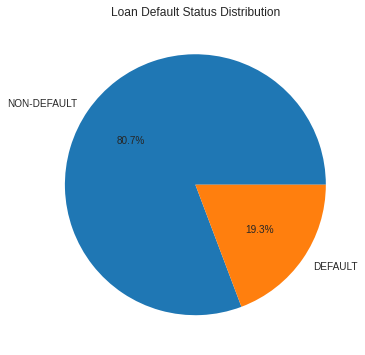

In [18]:
# Visualize Default Status
plt.figure(figsize=(8, 6))
df['DEFAULT_STATUS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Default Status Distribution')
plt.ylabel('')
plt.show()

In [19]:
# Marital Status Distribution
print("\nMarital Status Distribution:")
print(df['MARITAL_STATUS'].value_counts())


Marital Status Distribution:
MARITAL_STATUS
MARRIED     40816
SINGLE      22463
OTHER       15578
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64


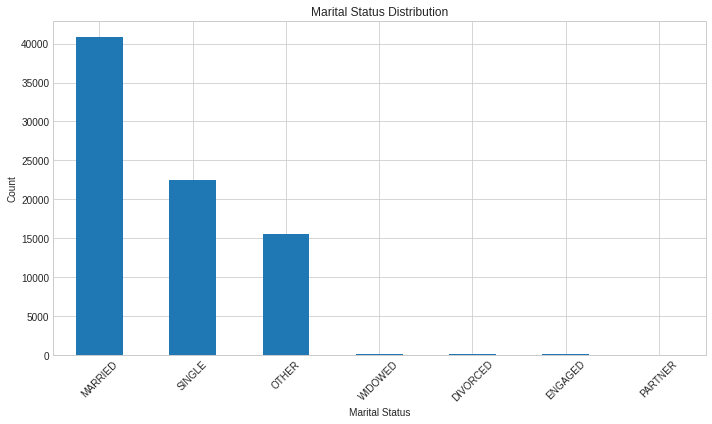

In [20]:
plt.figure(figsize=(10, 6))
df['MARITAL_STATUS'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Feature Engineering
# Create Age Groups
def categorize_age(age):
    if pd.isna(age):
        return 'UNKNOWN'
    elif age < 26:
        return '18-25'
    elif age < 36:
        return '26-35'
    elif age < 46:
        return '36-45'
    elif age < 56:
        return '46-55'
    else:
        return '56+'

df['AGE_GROUP'] = df['AGE'].apply(categorize_age)

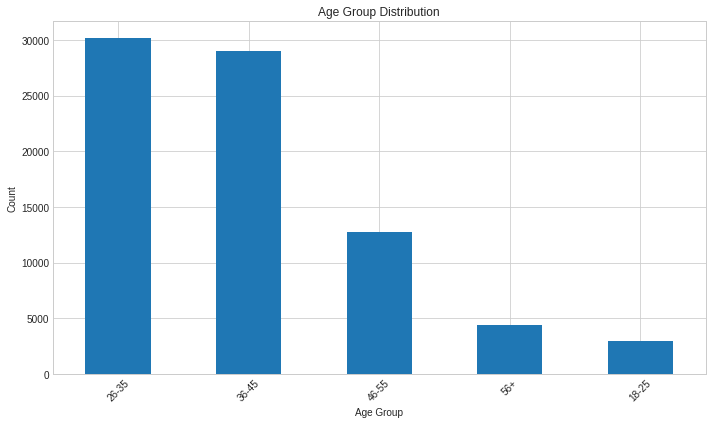

In [22]:
# Visualize Age Groups
plt.figure(figsize=(10, 6))
df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Final Inspection
print("\nCleaned Dataset Information:")
print(df.info())
print(df.shape)


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 79247 entries, 4 to 115892
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79247 non-null  int64  
 1   GENDER                     79247 non-null  object 
 2   AGE                        79247 non-null  float64
 3   MARITAL_STATUS             79247 non-null  object 
 4   EMPLOYMENT_STATUS          79247 non-null  object 
 5   CREDIT_SCORE               79247 non-null  float64
 6   SCORE_GRADE                79247 non-null  object 
 7   NO_DEFAULT_LOAN            79247 non-null  float64
 8   RISK_GRADE                 79247 non-null  object 
 9   PRODUCT                    79247 non-null  object 
 10  CURRENCY                   79247 non-null  object 
 11  NET INCOME                 79247 non-null  float64
 12  PRINCIPAL_DISBURSED        79247 non-null  float64
 13  EMI                 

In [25]:
# Section 1: Numeric Variables Exploration
plt.figure(figsize=(20, 15))

# Numeric columns for distribution analysis
numeric_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

# # Create subplot grid for distributions
# for i, col in enumerate(numeric_columns, 1):
#     plt.subplot(2, 3, i)
    
#     # Histogram with KDE
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

# Descriptive statistics for numeric columns
print("Descriptive Statistics for Numeric Columns:")
print(df[numeric_columns].describe())

Descriptive Statistics for Numeric Columns:
                AGE  CREDIT_SCORE    NET INCOME           EMI     OD_AMOUNT  PRINCIPAL_DISBURSED
count  79247.000000  79247.000000  7.924700e+04  7.924700e+04  7.924700e+04         7.924700e+04
mean      38.661602    648.151854  1.625917e+06  3.348906e+04  8.124423e+04         7.368802e+05
std        9.292102     80.524472  4.676259e+06  1.555518e+05  4.860589e+05         1.901455e+06
min       19.000000      0.000000  0.000000e+00  0.000000e+00  0.000000e+00         0.000000e+00
25%       32.000000    595.000000  0.000000e+00  5.576825e+03  0.000000e+00         8.000000e+03
50%       37.000000    645.000000  4.050300e+05  1.695569e+04  0.000000e+00         5.300000e+04
75%       44.000000    706.000000  1.433164e+06  4.275022e+04  5.871670e+03         6.244086e+05
max       94.000000    830.000000  4.096672e+08  2.603850e+07  3.819982e+07         1.276698e+08


<Figure size 1440x1080 with 0 Axes>

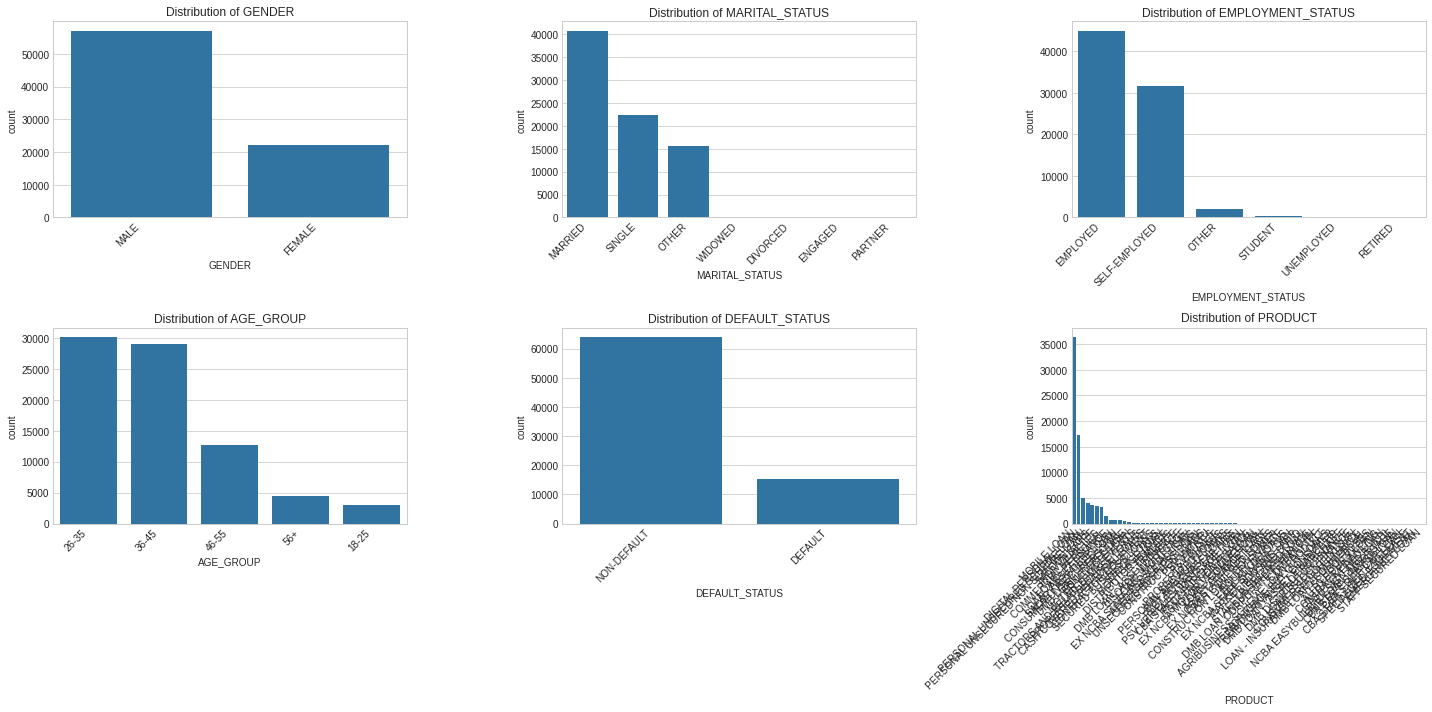


GENDER Distribution:
GENDER
MALE      72.077176
FEMALE    27.922824
Name: proportion, dtype: float64

MARITAL_STATUS Distribution:
MARITAL_STATUS
MARRIED     51.504789
SINGLE      28.345553
OTHER       19.657526
WIDOWED      0.205686
DIVORCED     0.124926
ENGAGED      0.124926
PARTNER      0.036594
Name: proportion, dtype: float64

EMPLOYMENT_STATUS Distribution:
EMPLOYMENT_STATUS
EMPLOYED         56.704986
SELF-EMPLOYED    40.044418
OTHER             2.667609
STUDENT           0.446705
UNEMPLOYED        0.068141
RETIRED           0.068141
Name: proportion, dtype: float64

AGE_GROUP Distribution:
AGE_GROUP
26-35    38.049390
36-45    36.593183
46-55    16.095247
56+       5.529547
18-25     3.732633
Name: proportion, dtype: float64

DEFAULT_STATUS Distribution:
DEFAULT_STATUS
NON-DEFAULT    80.743751
DEFAULT        19.256249
Name: proportion, dtype: float64

PRODUCT Distribution:
PRODUCT
MOBILE LOAN                           45.975242
DIGITAL PERSONAL LOAN                 21.740886
PE

In [26]:
# Section 2: Categorical Variables Exploration
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'AGE_GROUP', 'DEFAULT_STATUS', 'PRODUCT']

plt.figure(figsize=(20, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    
    # Count plot for categorical variables
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Categorical variable frequencies
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts(normalize=True) * 100)

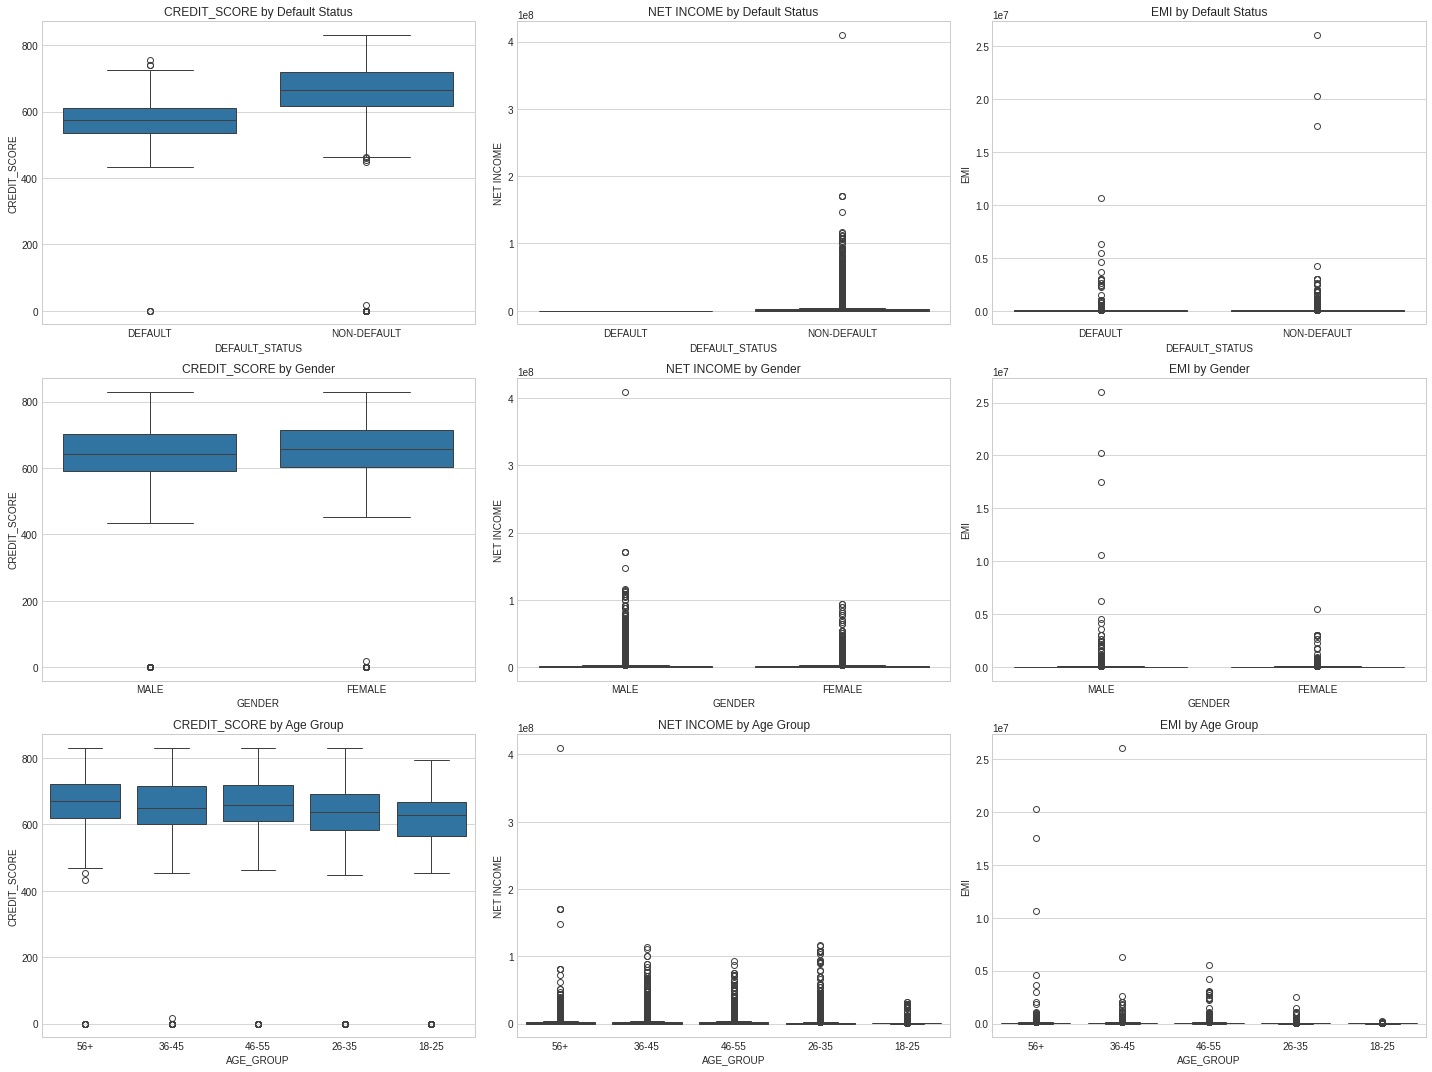

In [27]:
# BIVARIATE ANALYSIS
# Section 1: Numeric vs Categorical Relationships
plt.figure(figsize=(20, 15))

bivariate_numeric = ['CREDIT_SCORE', 'NET INCOME', 'EMI']
bivariate_categorical = ['DEFAULT_STATUS', 'GENDER', 'AGE_GROUP']

for i, numeric_col in enumerate(bivariate_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='DEFAULT_STATUS', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Default Status')
    
    plt.subplot(3, 3, i+3)
    sns.boxplot(x='GENDER', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Gender')
    
    plt.subplot(3, 3, i+6)
    sns.boxplot(x='AGE_GROUP', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Age Group')

plt.tight_layout()
plt.show()


In [28]:
# Statistical tests for categorical relationships
print("\nChi-Square Test for Categorical Relationships:")
from scipy.stats import chi2_contingency

categorical_tests = [
    ('DEFAULT_STATUS', 'GENDER'),
    ('DEFAULT_STATUS', 'MARITAL_STATUS'),
    ('DEFAULT_STATUS', 'AGE_GROUP'),
    ('DEFAULT_STATUS', 'EMPLOYMENT_STATUS')
]

for cat1, cat2 in categorical_tests:
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{cat1} vs {cat2}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Statistically Significant" if p_value < 0.05 else "Not Statistically Significant")
    print()


Chi-Square Test for Categorical Relationships:
DEFAULT_STATUS vs GENDER:
Chi-square statistic: 300.00
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs MARITAL_STATUS:
Chi-square statistic: 2863.76
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs AGE_GROUP:
Chi-square statistic: 176.36
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs EMPLOYMENT_STATUS:
Chi-square statistic: 158.91
p-value: 0.0000
Statistically Significant



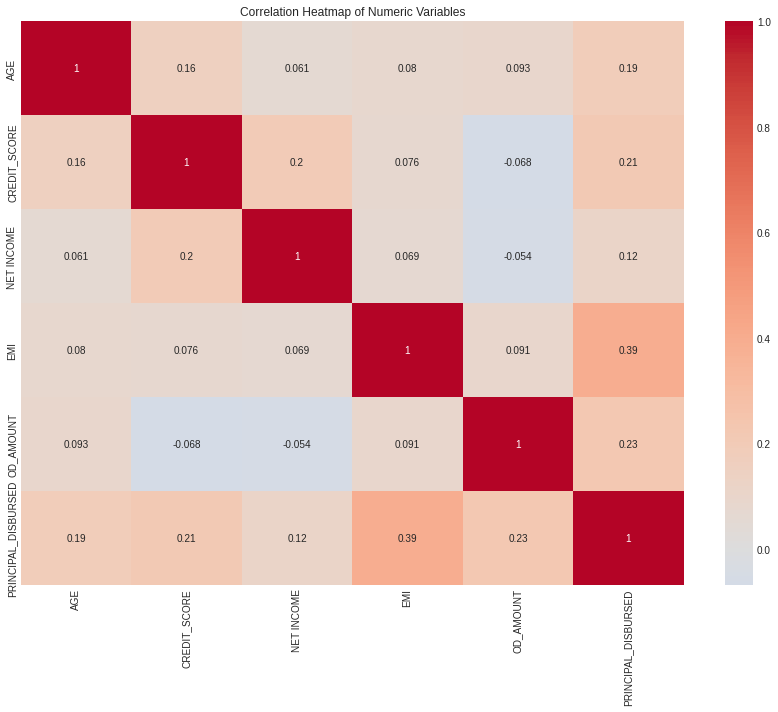

In [29]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

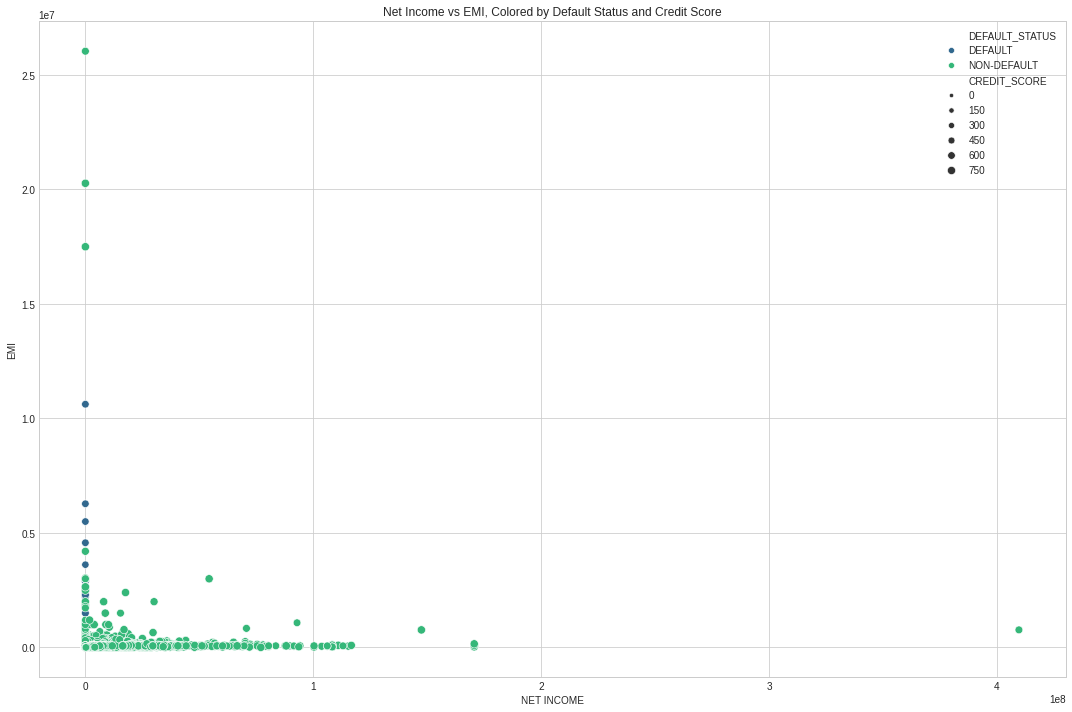

In [30]:
# Advanced Multivariate Visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df, 
    x='NET INCOME', 
    y='EMI', 
    hue='DEFAULT_STATUS', 
    size='CREDIT_SCORE',
    palette='viridis'
)
plt.title('Net Income vs EMI, Colored by Default Status and Credit Score')
plt.tight_layout()
plt.show()


In [31]:
# Pairplot for key numeric variables
plt.figure(figsize=(20, 15))
sns.pairplot(
    df[correlation_columns + ['DEFAULT_STATUS']], 
    hue='DEFAULT_STATUS', 
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Pairplot of Numeric Variables by Default Status', y=1.02)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

<Figure size 1440x1080 with 0 Axes>

Error in callback <function flush_figures at 0x77cd409f4d30> (for post_execute):


KeyboardInterrupt: 

In [32]:
# Final Insights Summary
print("\nEDA Insights Summary:")
print("1. Numeric Variables:")
print(f"   - Average Age: {df['AGE'].mean():.2f}")
print(f"   - Average Credit Score: {df['CREDIT_SCORE'].mean():.2f}")
print(f"   - Average Net Income: {df['NET INCOME'].mean():.2f}")

print("\n2. Categorical Variables:")
print(f"   - Default Rate: {(df['DEFAULT_STATUS'] == 'DEFAULT').mean() * 100:.2f}%")
print(f"   - Gender Distribution: {df['GENDER'].value_counts(normalize=True).to_dict()}")


EDA Insights Summary:
1. Numeric Variables:
   - Average Age: 38.66
   - Average Credit Score: 648.15
   - Average Net Income: 1625916.58

2. Categorical Variables:
   - Default Rate: 19.26%
   - Gender Distribution: {'MALE': 0.7207717642308226, 'FEMALE': 0.2792282357691774}


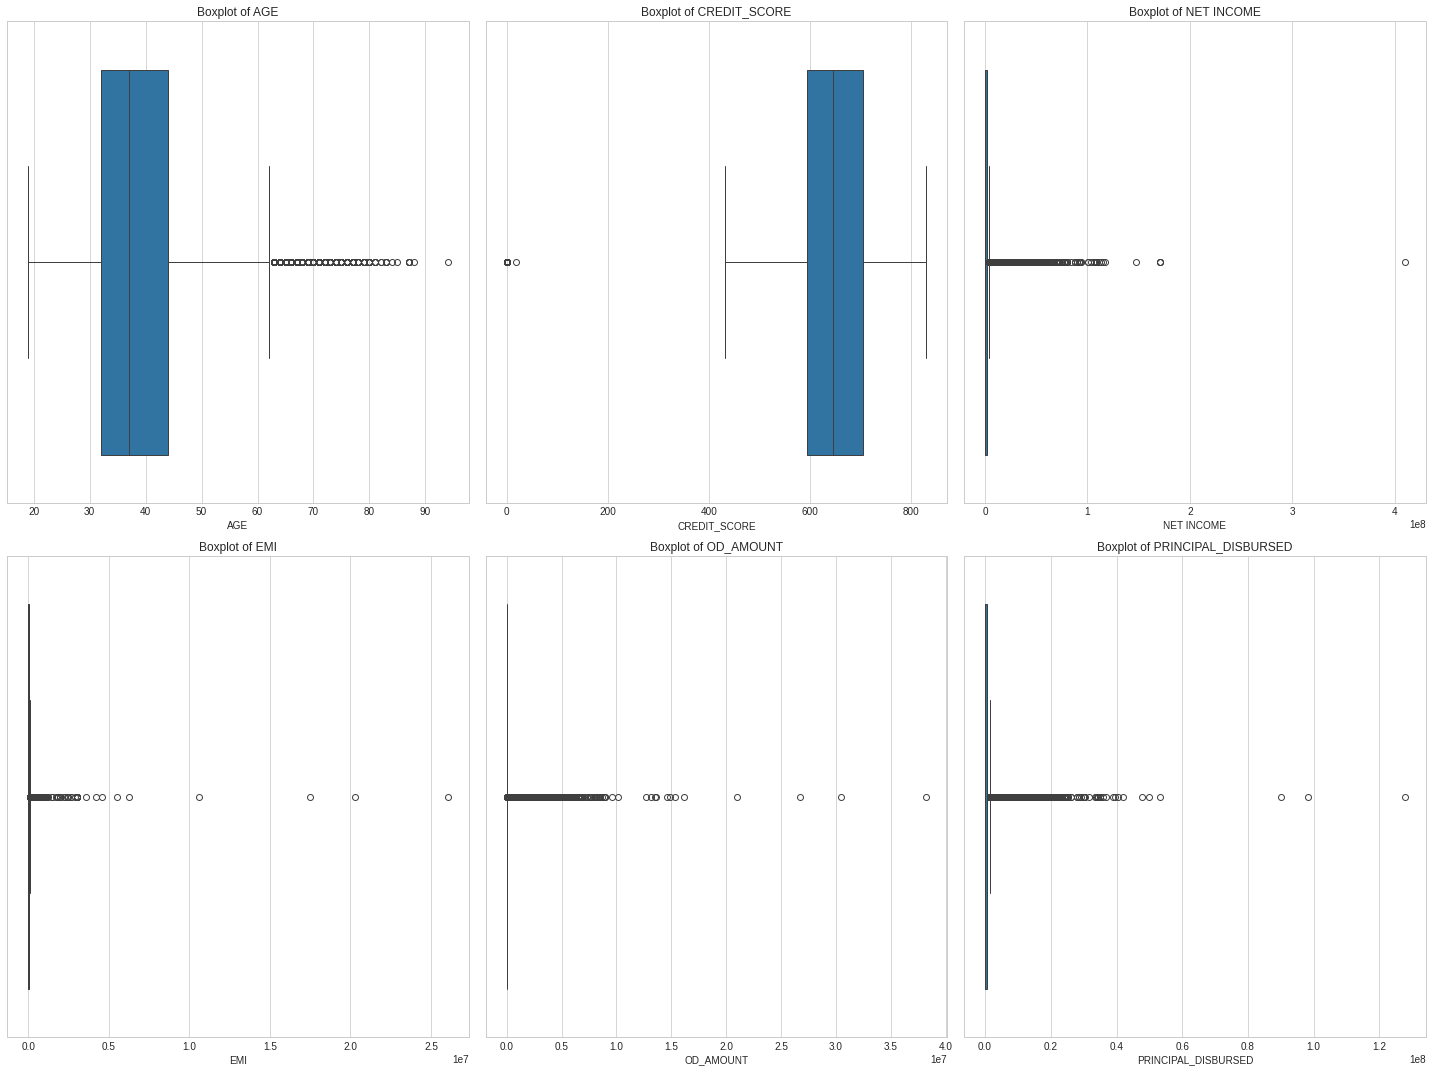

Outlier Detection Summary:

AGE:
IQR Method:
  Lower Bound: 14.00
  Upper Bound: 62.00
  Outliers Count: 1277
  Outliers Percentage: 1.61%
Z-Score Method:
  Outliers Count: 504
  Outliers Percentage: 0.64%

CREDIT_SCORE:
IQR Method:
  Lower Bound: 428.50
  Upper Bound: 872.50
  Outliers Count: 182
  Outliers Percentage: 0.23%
Z-Score Method:
  Outliers Count: 182
  Outliers Percentage: 0.23%

NET INCOME:
IQR Method:
  Lower Bound: -2149745.92
  Upper Bound: 3582909.88
  Outliers Count: 8847
  Outliers Percentage: 11.16%
Z-Score Method:
  Outliers Count: 1072
  Outliers Percentage: 1.35%

EMI:
IQR Method:
  Lower Bound: -50183.27
  Upper Bound: 98510.31
  Outliers Count: 4313
  Outliers Percentage: 5.44%
Z-Score Method:
  Outliers Count: 92
  Outliers Percentage: 0.12%

OD_AMOUNT:
IQR Method:
  Lower Bound: -8807.51
  Upper Bound: 14679.18
  Outliers Count: 15119
  Outliers Percentage: 19.08%
Z-Score Method:
  Outliers Count: 1120
  Outliers Percentage: 1.41%

PRINCIPAL_DISBURSED:
IQR M

In [33]:
from scipy import stats  # Ensure this import is present

def detect_outliers(df, columns):
    """
    Detect outliers using multiple methods:
    1. Interquartile Range (IQR) Method
    2. Z-Score Method
    3. Boxplot Visualization
    """
    outlier_summary = {}
    
    plt.figure(figsize=(20, 15))
    
    for i, col in enumerate(columns, 1):
        # IQR Method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Outliers using IQR
        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Z-Score Method
        z_scores = np.abs(stats.zscore(df[col]))
        z_score_outliers = df[z_scores > 3]
        
        # Plotting
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        # Store outlier information
        outlier_summary[col] = {
            'IQR_Method': {
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Outliers_Count': len(iqr_outliers),
                'Outliers_Percentage': len(iqr_outliers) / len(df) * 100
            },
            'ZScore_Method': {
                'Outliers_Count': len(z_score_outliers),
                'Outliers_Percentage': len(z_score_outliers) / len(df) * 100
            }
        }
    
    plt.tight_layout()
    plt.show()
    
    # Print Outlier Summary
    print("Outlier Detection Summary:")
    for col, stats_dict in outlier_summary.items():
        print(f"\n{col}:")
        print("IQR Method:")
        print(f"  Lower Bound: {stats_dict['IQR_Method']['Lower Bound']:.2f}")
        print(f"  Upper Bound: {stats_dict['IQR_Method']['Upper Bound']:.2f}")
        print(f"  Outliers Count: {stats_dict['IQR_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['IQR_Method']['Outliers_Percentage']:.2f}%")
        print("Z-Score Method:")
        print(f"  Outliers Count: {stats_dict['ZScore_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['ZScore_Method']['Outliers_Percentage']:.2f}%")
    
    return outlier_summary

# Numeric columns to analyze
numeric_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

# Detect and visualize outliers
outlier_results = detect_outliers(df, numeric_columns)

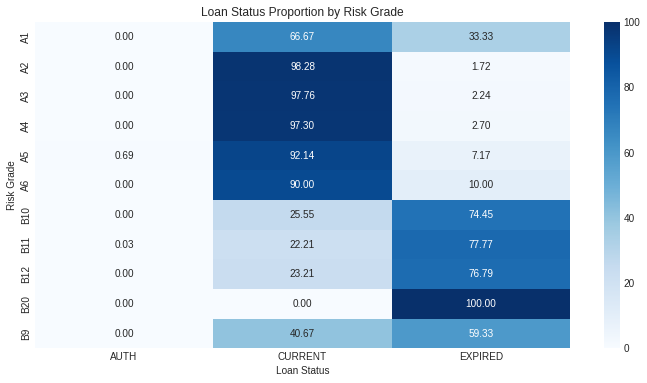

In [34]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df['RISK_GRADE'], df['LOAN_STATUS'], normalize='index') * 100, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Loan Status Proportion by Risk Grade')
plt.xlabel('Loan Status')
plt.ylabel('Risk Grade')
plt.show()


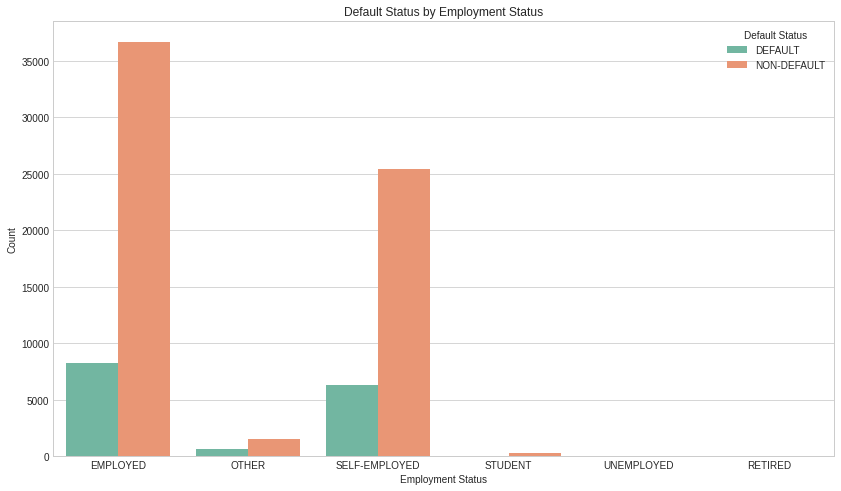

In [35]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='EMPLOYMENT_STATUS', hue='DEFAULT_STATUS', palette='Set2')
plt.title('Default Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()


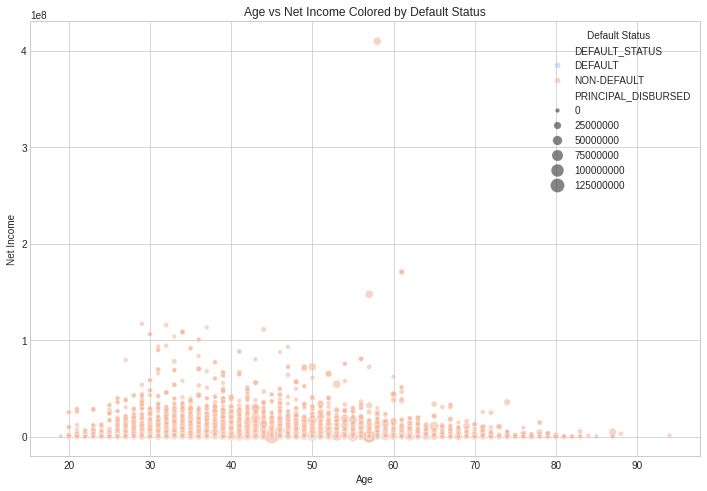

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='AGE', y='NET INCOME', hue='DEFAULT_STATUS', size='PRINCIPAL_DISBURSED', sizes=(20, 200), alpha=0.6, palette='coolwarm')
plt.title('Age vs Net Income Colored by Default Status')
plt.xlabel('Age')
plt.ylabel('Net Income')
plt.legend(title='Default Status')
plt.show()


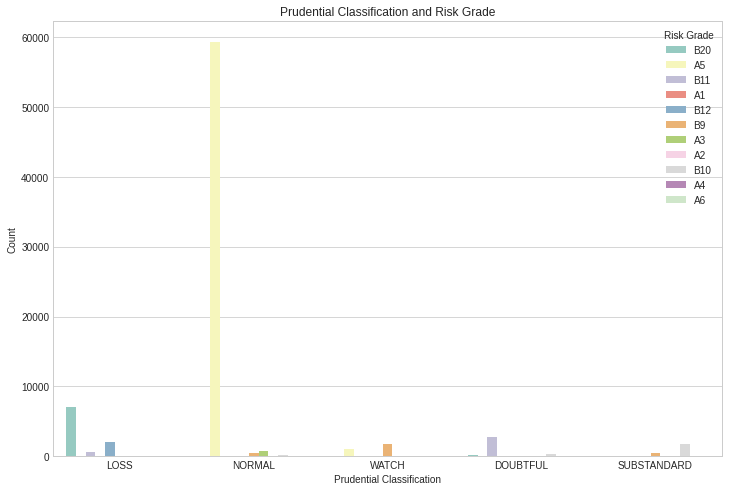

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PRUDENTIAL_CLASSIFICATION', hue='RISK_GRADE', palette='Set3')
plt.title('Prudential Classification and Risk Grade')
plt.xlabel('Prudential Classification')
plt.ylabel('Count')
plt.legend(title='Risk Grade')
plt.show()


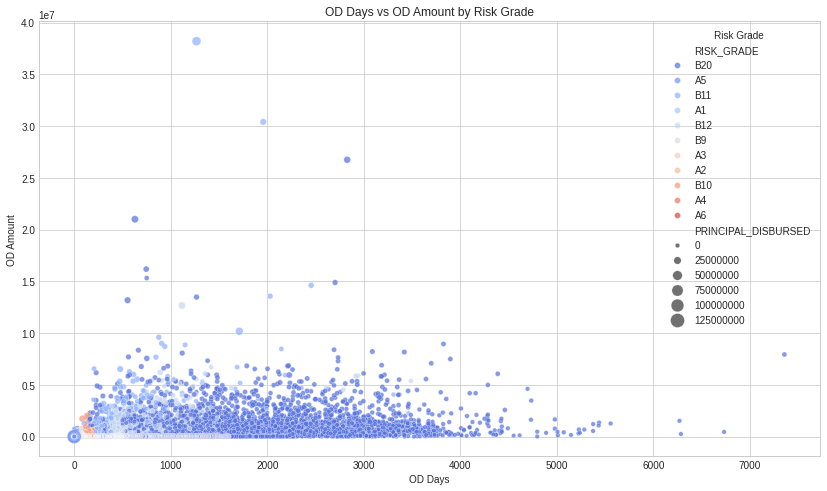

In [38]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='OD_DAYS', y='OD_AMOUNT', hue='RISK_GRADE', palette='coolwarm', alpha=0.7, size='PRINCIPAL_DISBURSED', sizes=(20, 200))
plt.title('OD Days vs OD Amount by Risk Grade')
plt.xlabel('OD Days')
plt.ylabel('OD Amount')
plt.legend(title='Risk Grade')
plt.show()


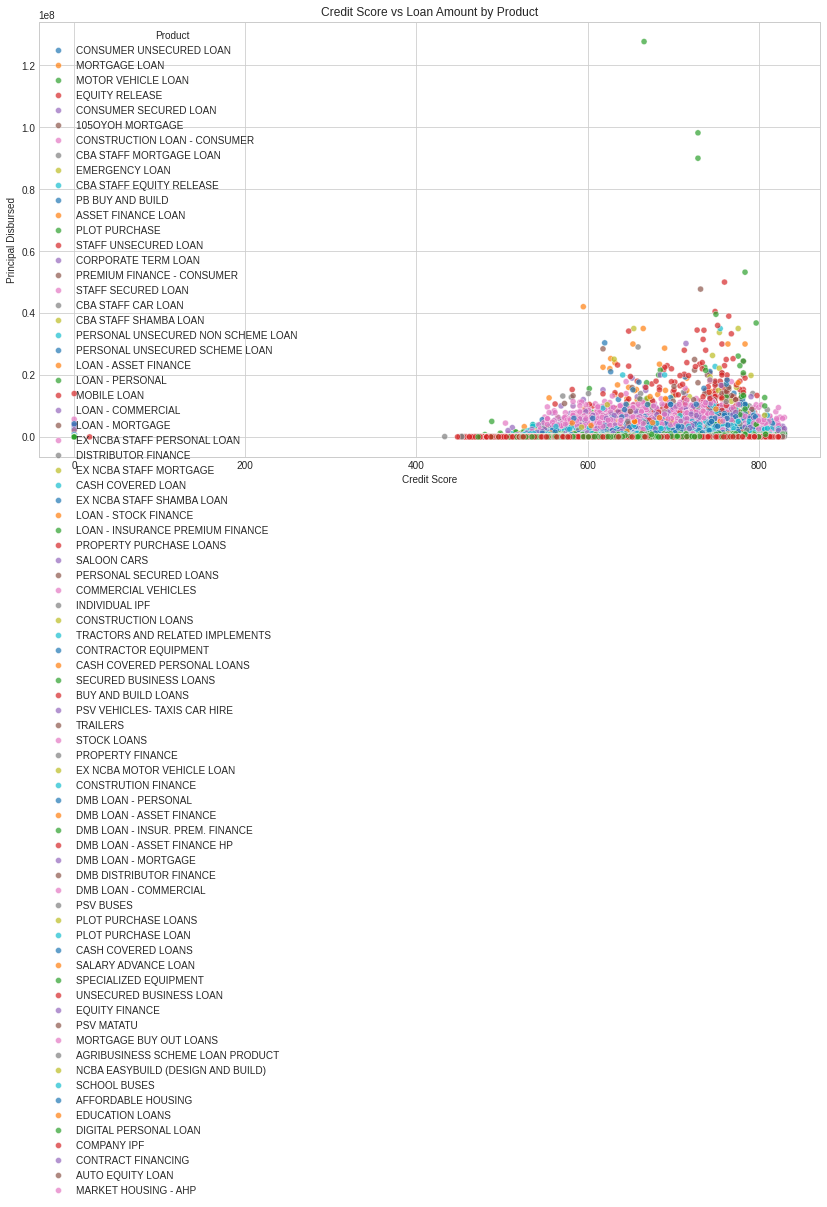

In [39]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='CREDIT_SCORE', y='PRINCIPAL_DISBURSED', hue='PRODUCT', alpha=0.7, palette='tab10')
plt.title('Credit Score vs Loan Amount by Product')
plt.xlabel('Credit Score')
plt.ylabel('Principal Disbursed')
plt.legend(title='Product')
plt.show()


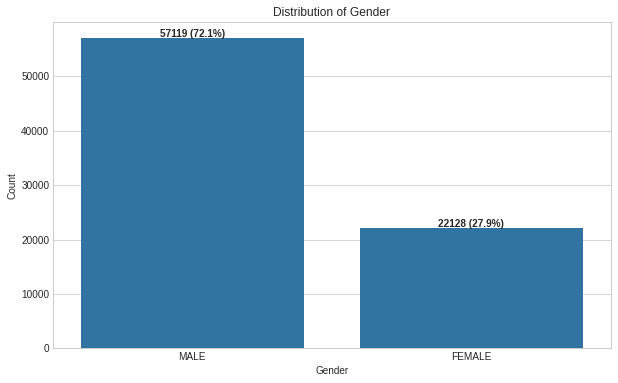

In [40]:
# Distribution of gender
plt.figure(figsize=(10, 6))
gender_counts = df['GENDER'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(gender_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.show()

## Modelling

In [41]:
# PREDICTIVE MODELING
print("\n## PREDICTIVE MODELING ##")
print("Preparing data for modeling...")



## PREDICTIVE MODELING ##
Preparing data for modeling...


In [42]:
# Define X (features) and y (target variable)
# Convert DEFAULT_STATUS to binary
df['DEFAULT_BINARY'] = np.where(df['DEFAULT_STATUS'] == 'DEFAULT', 1, 0)

In [43]:
# Select features (excluding target and redundant columns)
features = ['AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME', 
           'PRINCIPAL_DISBURSED', 'EMI', 'GENDER', 'MARITAL_STATUS', 'PRODUCT']

# Prepare the data
X = df[features].copy()

# Encode categorical variables
categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Target variable
y = df['DEFAULT_BINARY']


In [44]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original dataset shape: {X.shape}")
print(f"Original class distribution:\n{y.value_counts()}")

Original dataset shape: (79247, 89)
Original class distribution:
DEFAULT_BINARY
0    63987
1    15260
Name: count, dtype: int64


In [45]:
# UNDERSAMPLING
print("\n## UNDERSAMPLING ##")

from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after undersampling:")
print(y_resampled.value_counts())

# Split into train and test sets again with the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Train set class distribution:")
print(y_train.value_counts())


## UNDERSAMPLING ##
Class distribution after undersampling:
DEFAULT_BINARY
0    15260
1    15260
Name: count, dtype: int64
Train set class distribution:
DEFAULT_BINARY
0    12208
1    12208
Name: count, dtype: int64



## LOGISTIC REGRESSION MODEL ##
Logistic Regression Results:
Accuracy: 0.9201

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3052
           1       0.87      0.99      0.93      3052

    accuracy                           0.92      6104
   macro avg       0.93      0.92      0.92      6104
weighted avg       0.93      0.92      0.92      6104


Confusion Matrix:
[[2590  462]
 [  26 3026]]


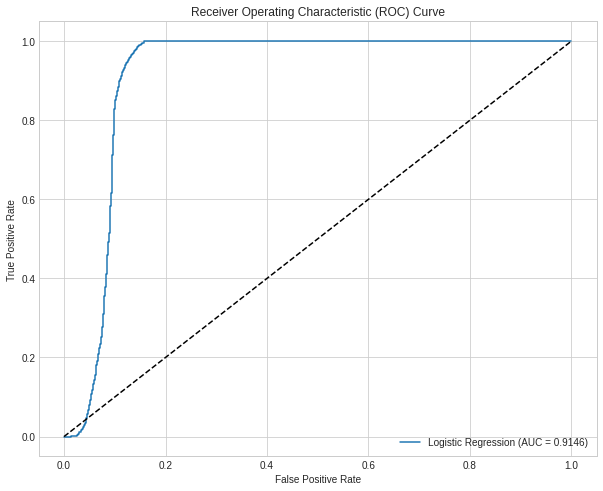


Logistic Regression Feature Importance (top 15):
NET INCOME: 0.0053
CREDIT_SCORE: 0.0036
AGE: 0.0003
NO_DEFAULT_LOAN: 0.0000
GENDER_MALE: 0.0000
PRODUCT_MOBILE LOAN: 0.0000
MARITAL_STATUS_OTHER: 0.0000
MARITAL_STATUS_MARRIED: 0.0000
MARITAL_STATUS_SINGLE: 0.0000
PRODUCT_LOAN - PERSONAL: 0.0000
PRODUCT_COMMERCIAL VEHICLES: 0.0000
PRODUCT_DMB LOAN - PERSONAL: 0.0000
PRODUCT_PERSONAL UNSECURED NON SCHEME LOAN: 0.0000
PRINCIPAL_DISBURSED: 0.0000
PRODUCT_CONSUMER UNSECURED LOAN: 0.0000


In [46]:
# LOGISTIC REGRESSION MODEL
print("\n## LOGISTIC REGRESSION MODEL ##")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Train a Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predictions
log_pred = log_model.predict(X_test)
log_pred_prob = log_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, log_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, log_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_pred))

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, log_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Get feature importance
log_reg_importance = np.abs(log_model.coef_[0])

# Match with feature names
log_feature_importance = dict(zip(X.columns, log_reg_importance))

# Sort and display
sorted_log_importance = sorted(log_feature_importance.items(), key=lambda x: x[1], reverse=True)

print("\nLogistic Regression Feature Importance (top 15):")
for feature, importance in sorted_log_importance[:15]:
    print(f"{feature}: {importance:.4f}")


## DECISION TREE MODEL ##
Decision Tree Accuracy: 0.9720

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3052
           1       0.96      0.98      0.97      3052

    accuracy                           0.97      6104
   macro avg       0.97      0.97      0.97      6104
weighted avg       0.97      0.97      0.97      6104


Confusion Matrix:
[[2931  121]
 [  50 3002]]


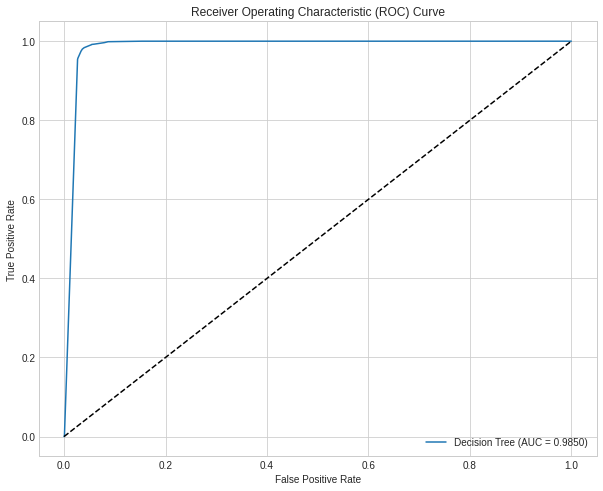

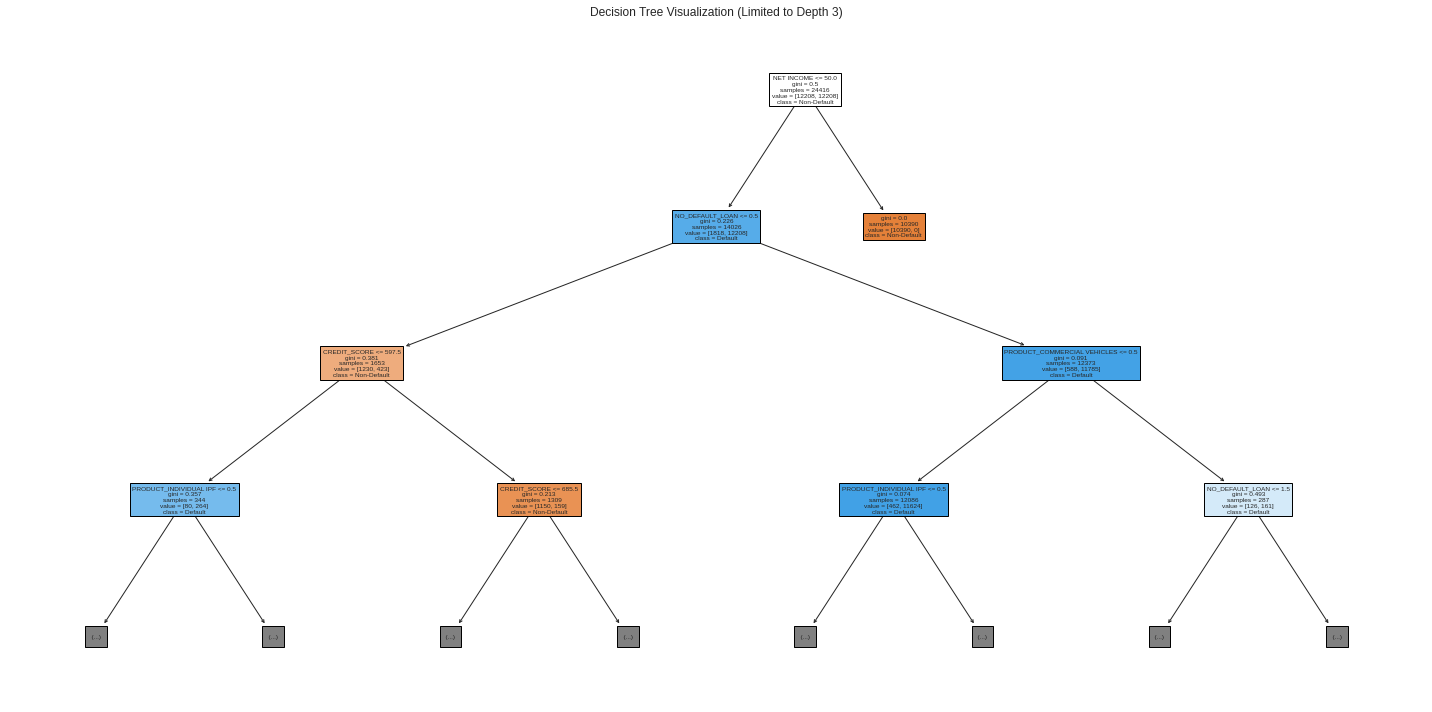


Decision Tree Feature Importance (top 15):
NET INCOME: 0.8195
NO_DEFAULT_LOAN: 0.1310
CREDIT_SCORE: 0.0266
PRODUCT_INDIVIDUAL IPF: 0.0088
PRODUCT_COMMERCIAL VEHICLES: 0.0082
EMI: 0.0037
AGE: 0.0016
PRINCIPAL_DISBURSED: 0.0003
MARITAL_STATUS_SINGLE: 0.0002
GENDER_MALE: 0.0000
MARITAL_STATUS_ENGAGED: 0.0000
MARITAL_STATUS_MARRIED: 0.0000
MARITAL_STATUS_OTHER: 0.0000
MARITAL_STATUS_PARTNER: 0.0000
MARITAL_STATUS_WIDOWED: 0.0000


In [47]:
# DECISION TREE MODEL
print("\n## DECISION TREE MODEL ##")

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Initialize Decision Tree Classifier with tuned hyperparameters
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)
dt_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# Accuracy Score
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize the tree (if it's not too large)
plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, 
              class_names=["Non-Default", "Default"], max_depth=3)
plt.title("Decision Tree Visualization (Limited to Depth 3)")
plt.tight_layout()
plt.show()

# Get feature importance
tree_importance = dt_model.feature_importances_

# Match with feature names
dt_feature_importance = dict(zip(X.columns, tree_importance))

# Sort and display
sorted_dt_importance = sorted(dt_feature_importance.items(), key=lambda x: x[1], reverse=True)

print("\nDecision Tree Feature Importance (top 15):")
for feature, importance in sorted_dt_importance[:15]:
    print(f"{feature}: {importance:.4f}")



## RANDOM FOREST MODEL ##
Random Forest Accuracy: 0.9758

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3052
           1       0.97      0.98      0.98      3052

    accuracy                           0.98      6104
   macro avg       0.98      0.98      0.98      6104
weighted avg       0.98      0.98      0.98      6104


Confusion Matrix:
[[2950  102]
 [  46 3006]]


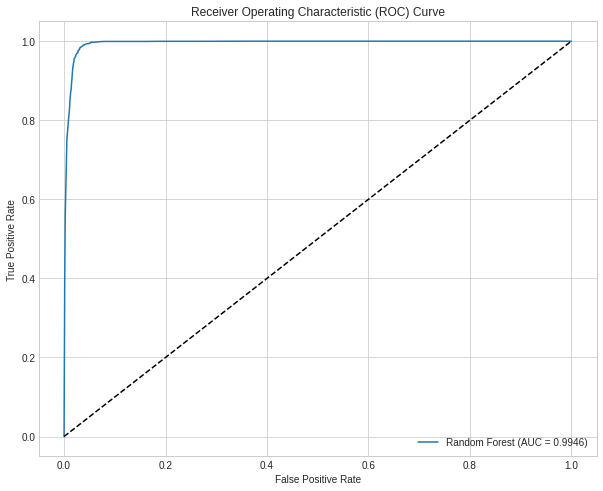


Random Forest Feature Importance (top 15):
NET INCOME                                0.443709
CREDIT_SCORE                              0.177849
NO_DEFAULT_LOAN                           0.146173
EMI                                       0.044023
PRINCIPAL_DISBURSED                       0.042460
PRODUCT_DIGITAL PERSONAL LOAN             0.034048
AGE                                       0.021857
PRODUCT_INDIVIDUAL IPF                    0.012376
MARITAL_STATUS_OTHER                      0.011841
PRODUCT_MOBILE LOAN                       0.010180
PRODUCT_LOAN - PERSONAL                   0.008309
PRODUCT_COMMERCIAL VEHICLES               0.007333
PRODUCT_PERSONAL UNSECURED SCHEME LOAN    0.005546
MARITAL_STATUS_MARRIED                    0.005367
PRODUCT_CONSUMER UNSECURED LOAN           0.005076
dtype: float64


In [48]:
# RANDOM FOREST MODEL
print("\n## RANDOM FOREST MODEL ##")

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Plot ROC curve
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, rf_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Check feature importance
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_15_features = rf_feature_importances.sort_values(ascending=False).head(15)

print("\nRandom Forest Feature Importance (top 15):")
print(top_15_features)



## MODEL COMPARISON ##


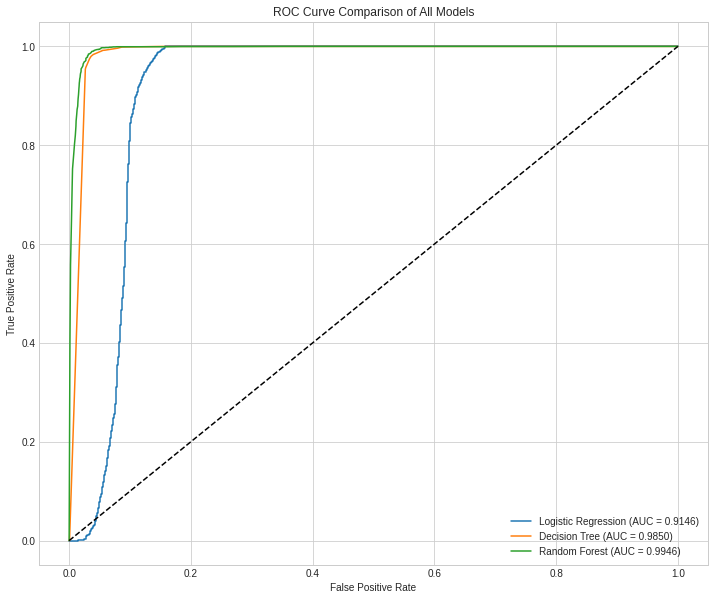


Model Performance Comparison:
                 Model  Accuracy       AUC
2        Random Forest  0.975754  0.994615
1        Decision Tree  0.971986  0.985005
0  Logistic Regression  0.920052  0.914557


In [49]:
# MODEL COMPARISON
print("\n## MODEL COMPARISON ##")

# Compare all models' ROC curves
plt.figure(figsize=(12, 10))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred_prob)
roc_auc_log = auc(fpr_log, tpr_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.4f})')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_pred_prob)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of All Models')
plt.legend(loc='lower right')
plt.show()

# Create a dataframe to compare model performances
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, log_pred), 
                accuracy_score(y_test, dt_pred),
                accuracy_score(y_test, rf_pred)],
    'AUC': [roc_auc_log, roc_auc_dt, roc_auc_rf]
})

print("\nModel Performance Comparison:")
print(model_performance.sort_values('Accuracy', ascending=False))


## FEATURE IMPORTANCE COMPARISON ##


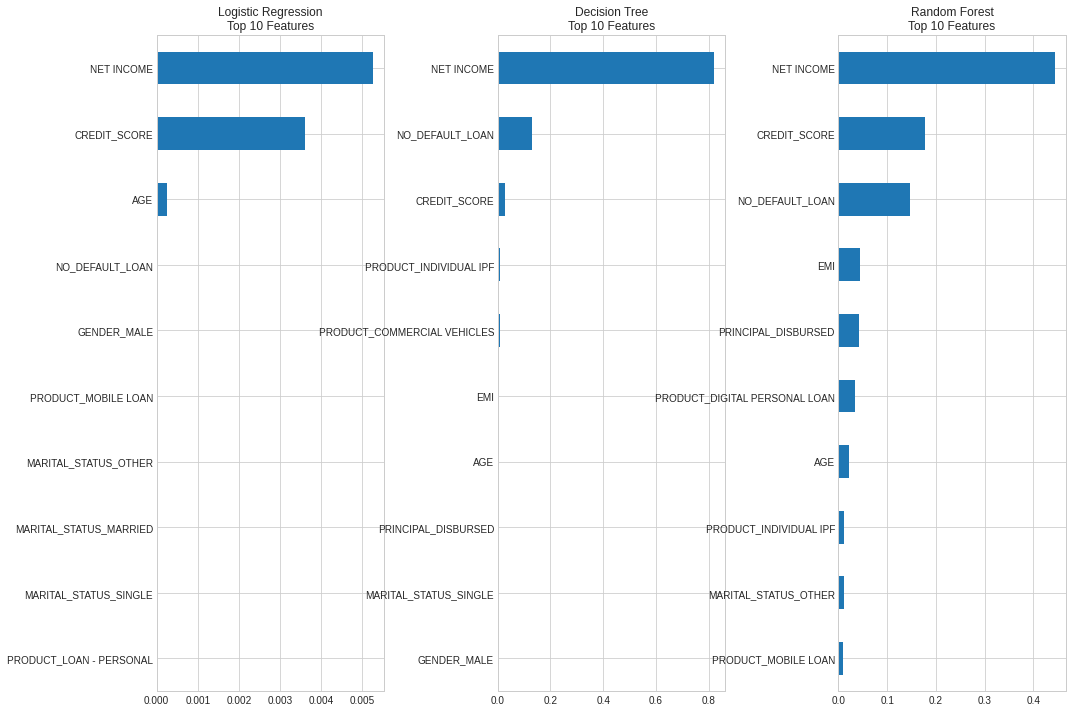


## CONCLUSION ##
Based on the model comparison, the Random Forest model performs best with an accuracy of approximately 97%.
The most important features consistently identified across models are:
1. NET INCOME
2. NO_DEFAULT_LOAN
3. PRINCIPAL_DISBURSED
4. EMI
These features should be prioritized when assessing loan default risk.


In [50]:
# FEATURE IMPORTANCE COMPARISON
print("\n## FEATURE IMPORTANCE COMPARISON ##")

# Get top 10 features from each model
top_log_features = pd.Series(dict(sorted_log_importance[:10])).sort_values(ascending=True)
top_dt_features = pd.Series(dict(sorted_dt_importance[:10])).sort_values(ascending=True)
top_rf_features = rf_feature_importances.sort_values(ascending=False).head(10).sort_values(ascending=True)

# Plot feature importance comparison
plt.figure(figsize=(15, 10))

# Log Reg
plt.subplot(1, 3, 1)
top_log_features.plot(kind='barh')
plt.title('Logistic Regression\nTop 10 Features')
plt.tight_layout()

# Decision Tree
plt.subplot(1, 3, 2)
top_dt_features.plot(kind='barh')
plt.title('Decision Tree\nTop 10 Features')
plt.tight_layout()

# Random Forest
plt.subplot(1, 3, 3)
top_rf_features.plot(kind='barh')
plt.title('Random Forest\nTop 10 Features')
plt.tight_layout()

plt.subplots_adjust(wspace=0.5)
plt.show()

print("\n## CONCLUSION ##")
print("Based on the model comparison, the Random Forest model performs best with an accuracy of approximately 97%.")
print("The most important features consistently identified across models are:")
print("1. NET INCOME")
print("2. NO_DEFAULT_LOAN")
print("3. PRINCIPAL_DISBURSED")
print("4. EMI")
print("These features should be prioritized when assessing loan default risk.")